In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import numpy as np
import random
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils  import to_categorical

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#gpu = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpu[0], True)

%matplotlib inline

Using TensorFlow backend.


In [2]:
def random_img(size=(50,50),nbr=10,length=10,noise=True,horizontal=None):
    # size       -> size of image
    # nbr        -> amount of lines
    # length     -> length of lines
    # horizontal -> True or False (for horizontal or vertical lines)
    # noise      -> if True then image is filled with noise 
    
    
    if horizontal is None:
        horizontal = bool(random.getrandbits(1))
    
    if noise:
        img = np.random.rand(size[0],size[1])
        img *= 255
        
    else:
        img = np.zeros(size)
        
    img = img.astype(np.uint8)
    
    for i in range(nbr):
        x = random.randint(0,size[0]-1)
        y = random.randint(0,size[1]-length)
        if not horizontal:
            img[x,y:y+length] = 255
        else:
            img[y:y+length,x] = 255
        
    return img

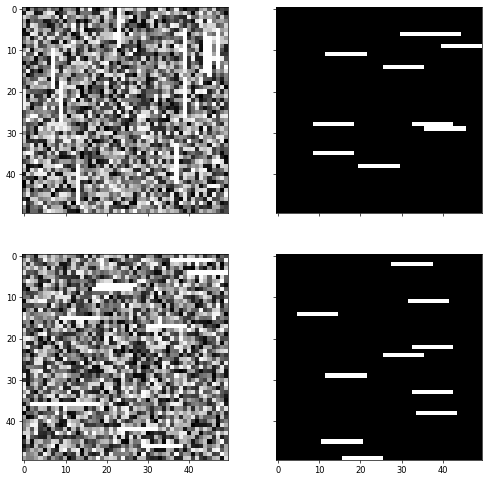

In [3]:
size = (50,50)
fig, axes = plt.subplots(2, 2, figsize=(10,10),dpi=60, sharex=True, sharey=True)
axes[0,0].imshow(random_img(size=size),cmap="gray")
axes[0,1].imshow(random_img(size=size,noise=False),cmap="gray")
axes[1,0].imshow(random_img(size=size,horizontal=False),cmap="gray")
axes[1,1].imshow(random_img(size=size,horizontal=False,noise=False),cmap="gray")
plt.show()

In [4]:
def create_dataset(size=(50,50),length=1000,noise=False):
    x,y = [],[]
    for i in range(length):
        horizontal = bool(random.getrandbits(1))
        x.append(random_img(size=size,noise=noise,horizontal=horizontal))
        y.append(horizontal)
    return np.array(x),np.array(y)

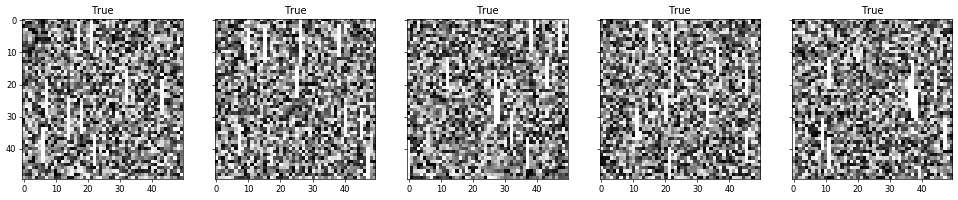

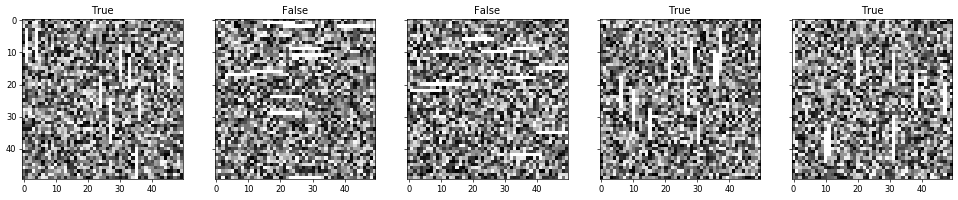

True Label in Trainset:  504
True Label in Testset :  509


In [5]:
noise = True
trainset = create_dataset(noise=noise)
testset = create_dataset(noise=noise)

fig, axes = plt.subplots(1, 5, figsize=(20,10),dpi=60, sharex=True, sharey=True)
for i in range(5):
    axes[i].imshow(trainset[0][i],cmap = "gray")
    axes[i].set_title("{}".format(trainset[1][i]))
plt.show()


fig, axes = plt.subplots(1, 5, figsize=(20,10),dpi=60, sharex=True, sharey=True)
for i in range(5):
    axes[i].imshow(testset[0][i],cmap = "gray")
    axes[i].set_title("{}".format(testset[1][i]))
plt.show()

y = trainset[1]
print("True Label in Trainset: ",len(y[y == True]))
y = testset[1]
print("True Label in Testset : ",len(y[y == True]))

In [6]:

x_train = trainset[0].astype('float32')
x_test = testset[0].astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(trainset[1])
y_test = to_categorical(testset[1])

In [7]:
model = Sequential()
num_classes = 2
channel = 1
kernel_size = (5,5)
input_shape = (size[0],size[1],1)
print(input_shape)
model.add(Conv2D(1, kernel_size,
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(size[0]-kernel_size[0],size[1]-kernel_size[1] )))
model.add(Flatten())
model.add(Dense(1))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

opt = keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.reshape(len(x_train),size[0],size[1],1)
x_test = x_test.reshape(len(x_test),size[0],size[1],1)
print(x_train[0].shape)

(50, 50, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 1)         26        
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 1)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4         
_________________________________________________________________
activation_2 (Activation)    (None, 2)    

In [8]:
print(x_train.shape)
batch_size = 20
epochs = 50
print(x_train.shape)
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)



(1000, 50, 50, 1)
(1000, 50, 50, 1)
Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 1s 604us/step - loss: 0.6914 - accuracy: 0.5140 - val_loss: 0.6733 - val_accuracy: 0.7110
Epoch 2/50
1000/1000 [==============================] - 0s 444us/step - loss: 0.6469 - accuracy: 0.6710 - val_loss: 0.6124 - val_accuracy: 0.9320
Epoch 3/50
1000/1000 [==============================] - 0s 462us/step - loss: 0.5689 - accuracy: 0.8410 - val_loss: 0.4997 - val_accuracy: 0.9230
Epoch 4/50
1000/1000 [==============================] - 0s 442us/step - loss: 0.4394 - accuracy: 0.8930 - val_loss: 0.3860 - val_accuracy: 0.8660
Epoch 5/50
1000/1000 [==============================] - 0s 434us/step - loss: 0.3219 - accuracy: 0.9180 - val_loss: 0.2565 - val_accuracy: 0.9530
Epoch 6/50
1000/1000 [==============================] - 0s 420us/step - loss: 0.2316 - accuracy: 0.9460 - val_loss: 0.1920 - val_accuracy: 0.9520
Epoch 7/50
1000/1000 [==================

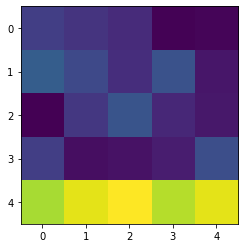

In [9]:
weights = model.get_weights()
plt.imshow(weights[0].reshape(kernel_size))
plt.show()



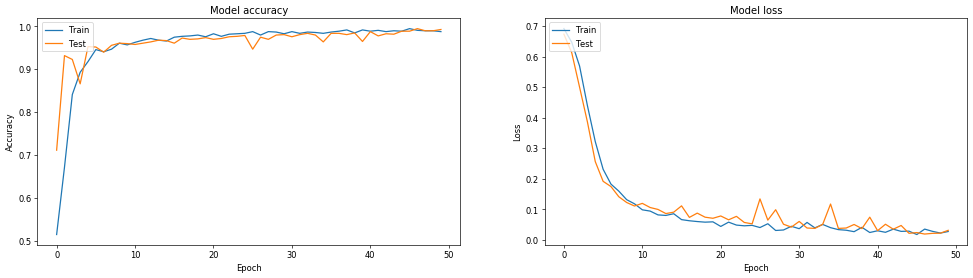

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20,5),dpi=60, sharex=False, sharey=False)

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Test'], loc='upper left')
plt.show()